In [2]:
# Center generator
# Trajectory plotter

import os
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math
import json

/home/chanfreau/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/chanfreau/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/chanfreau/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

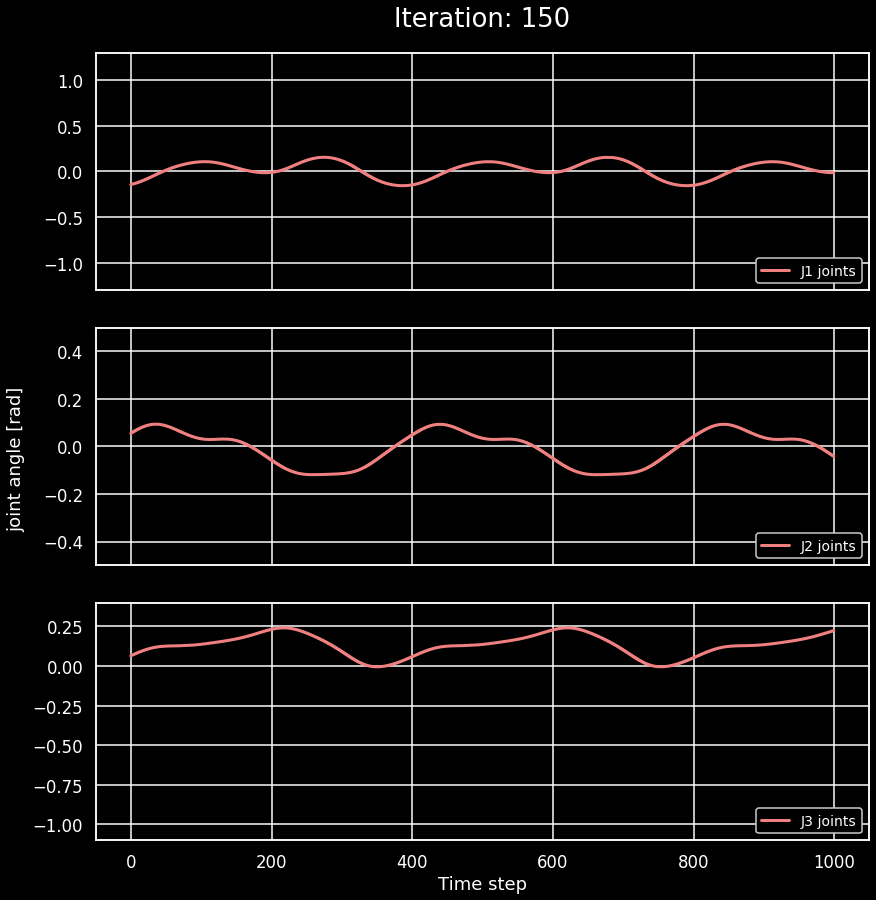

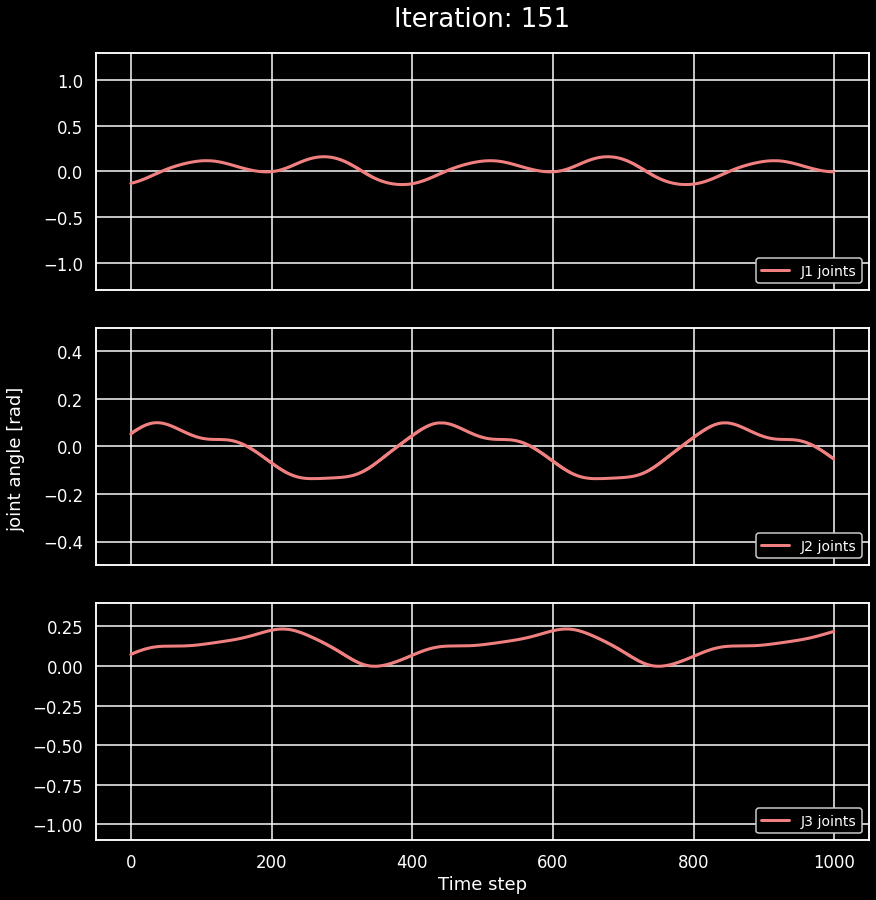

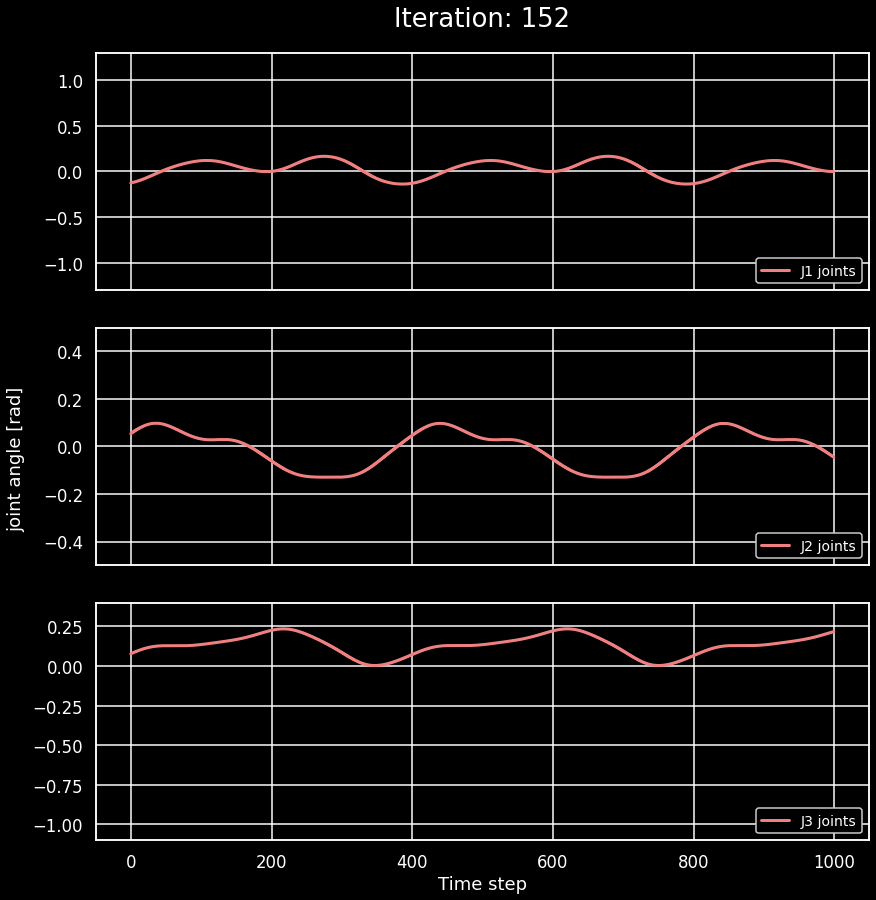

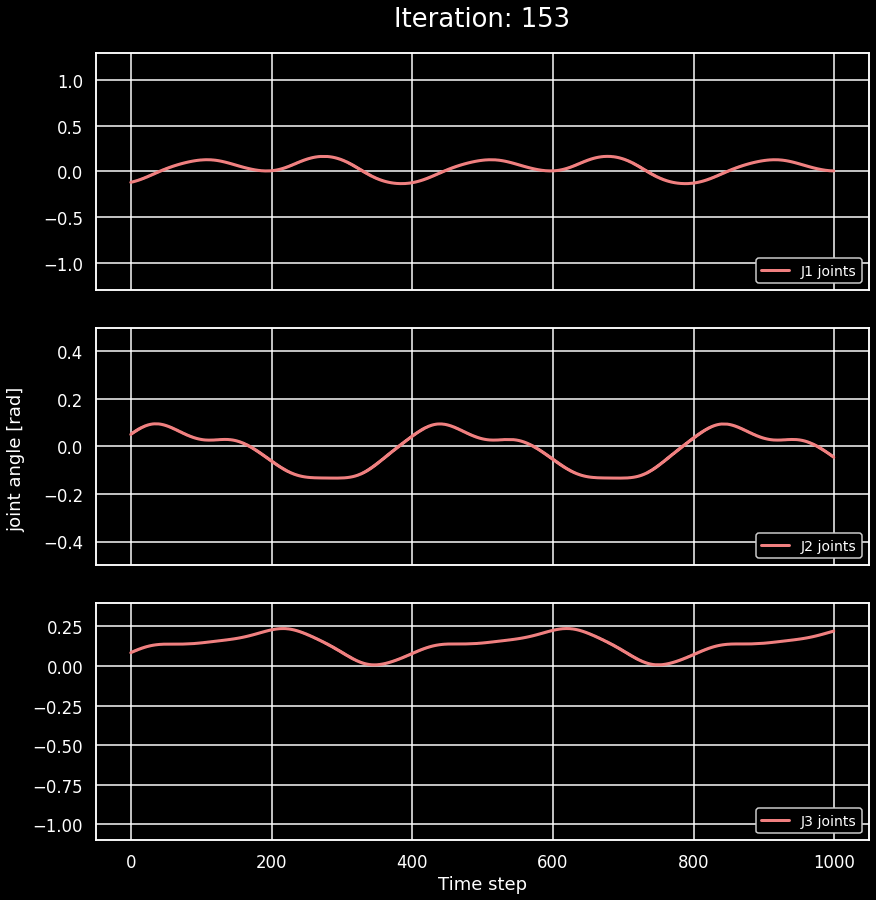

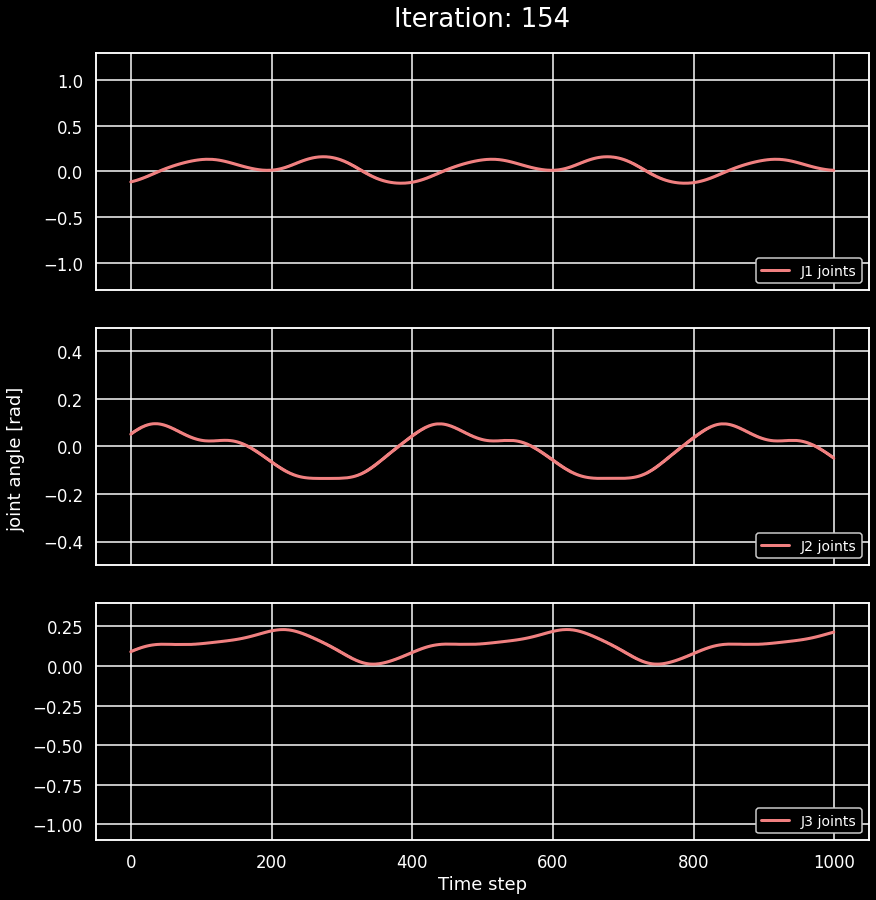

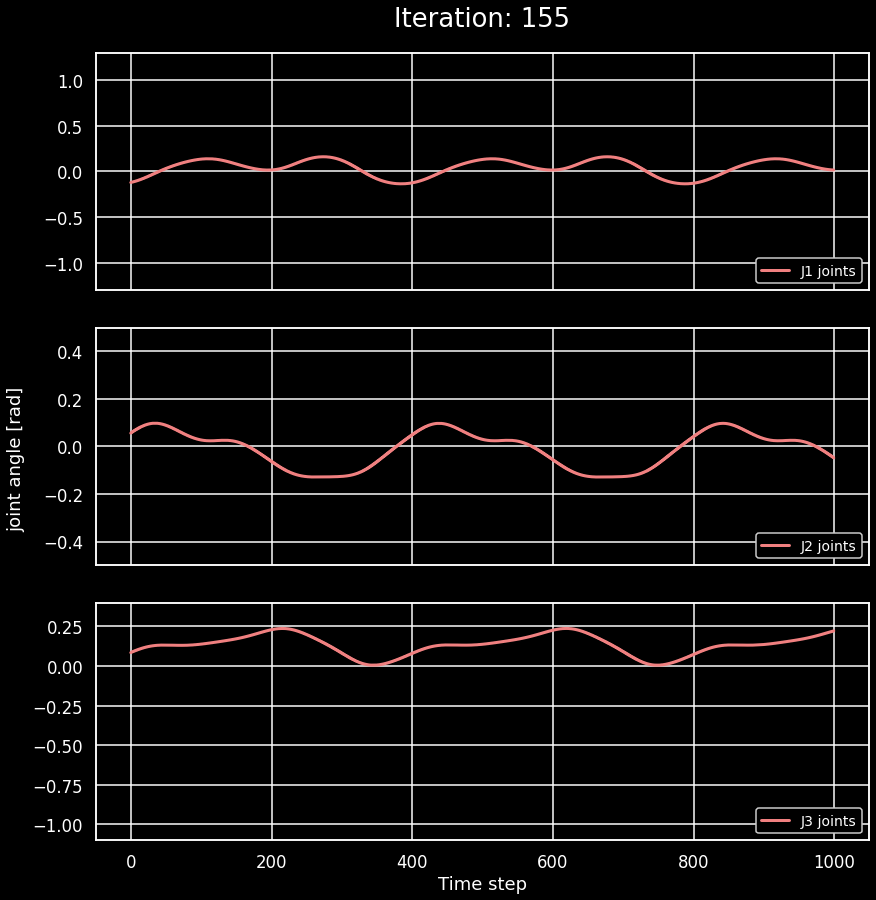

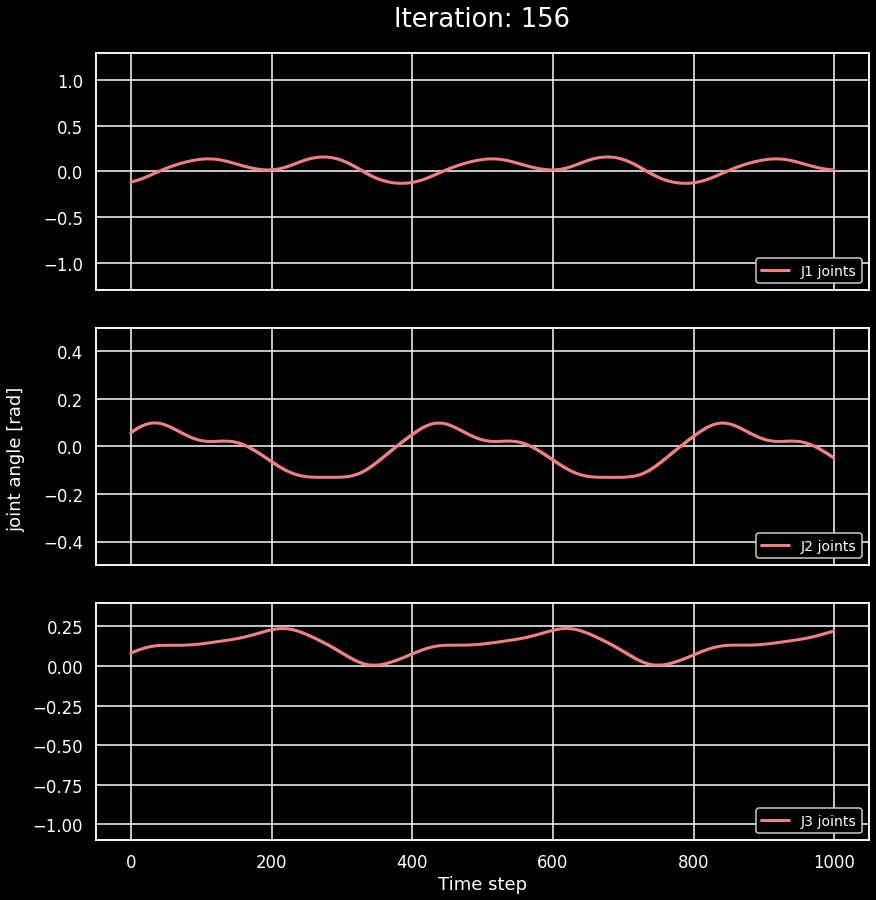

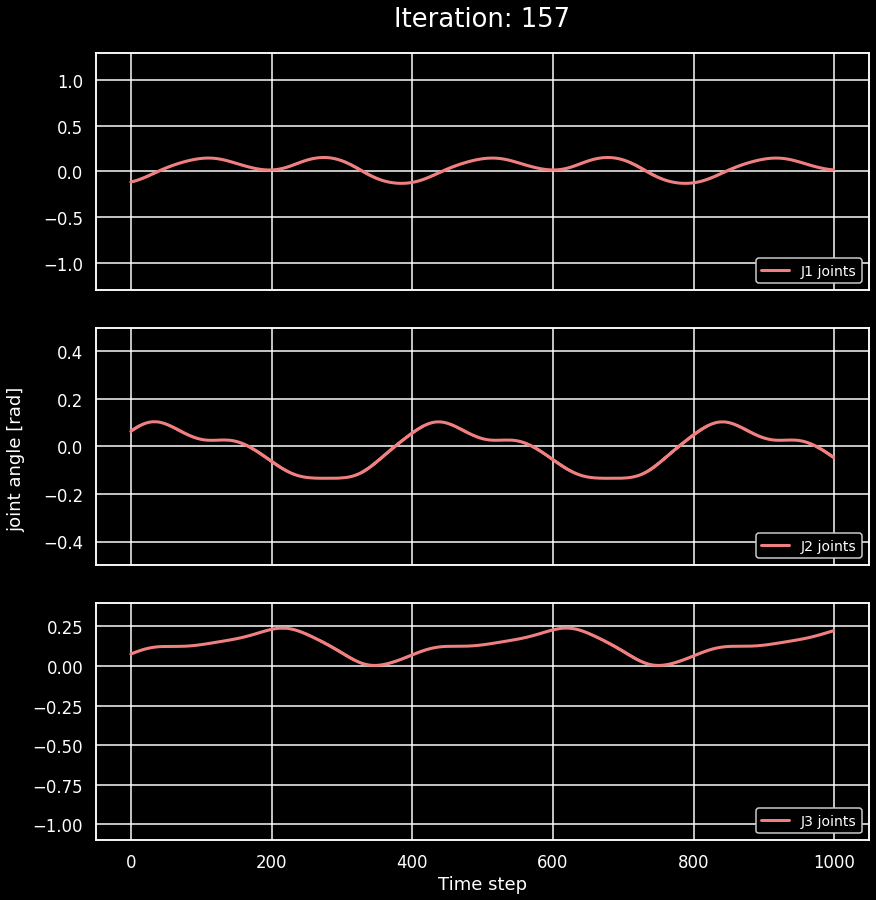

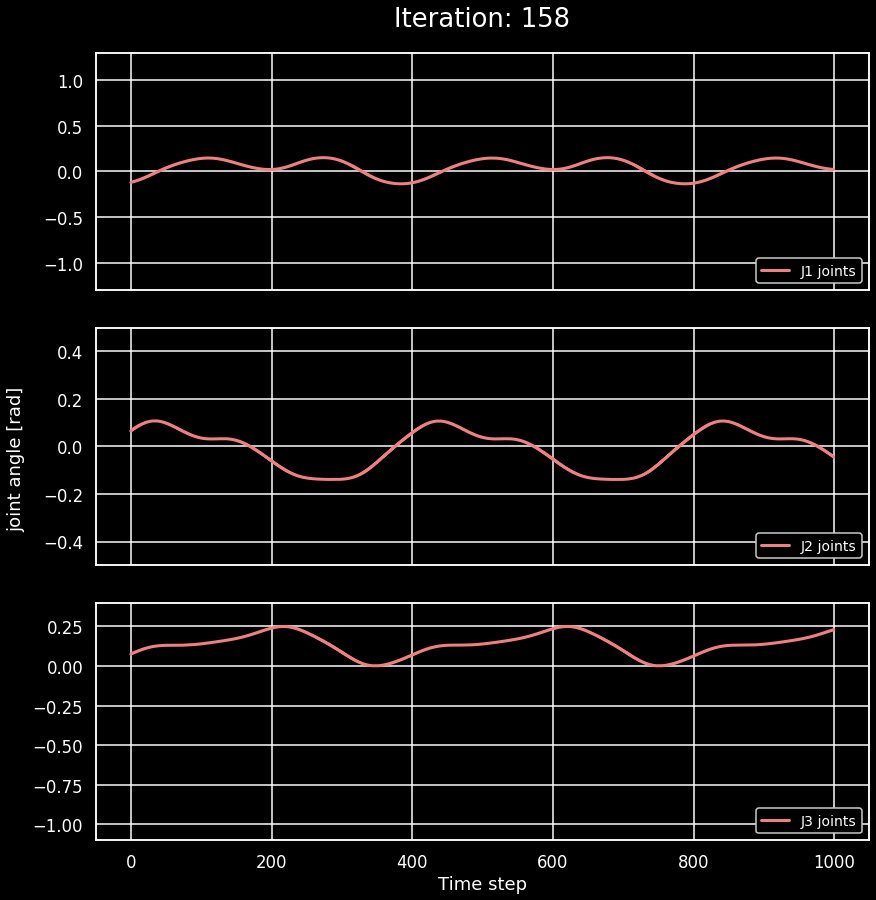

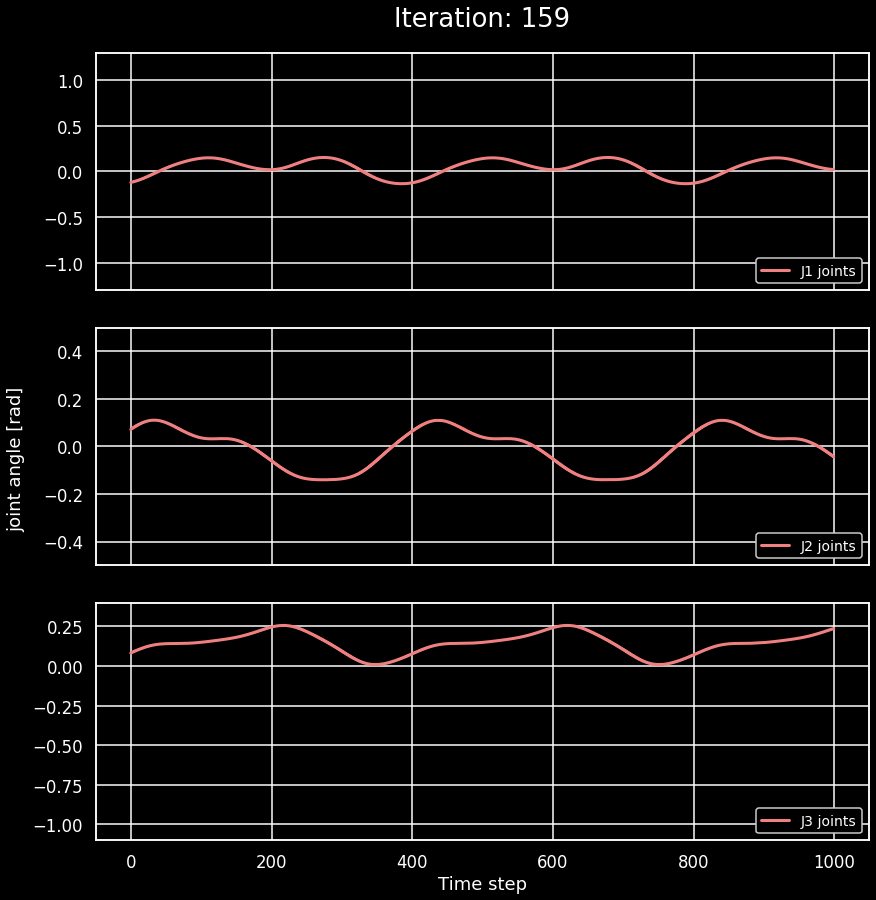

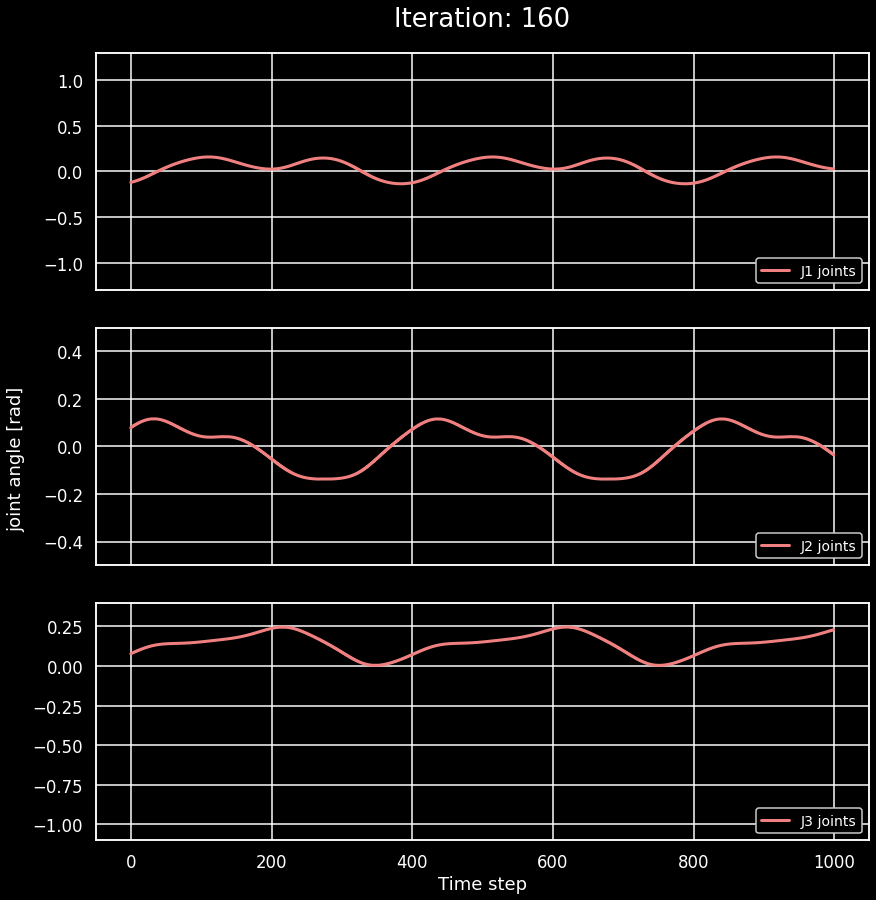

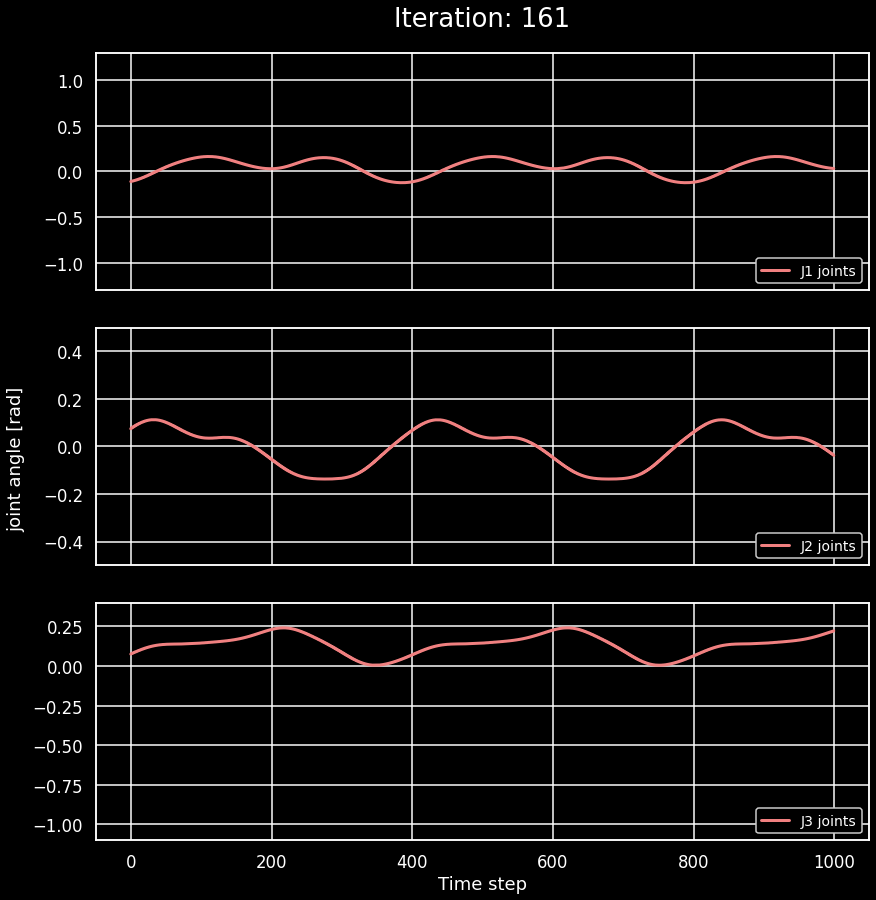

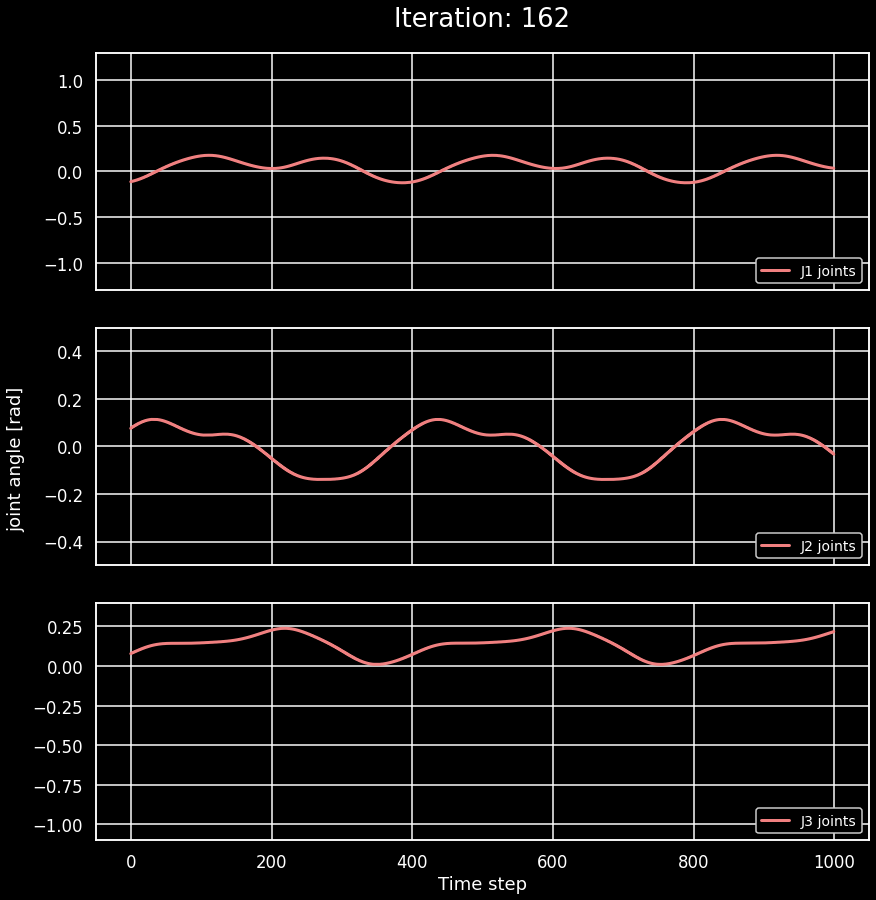

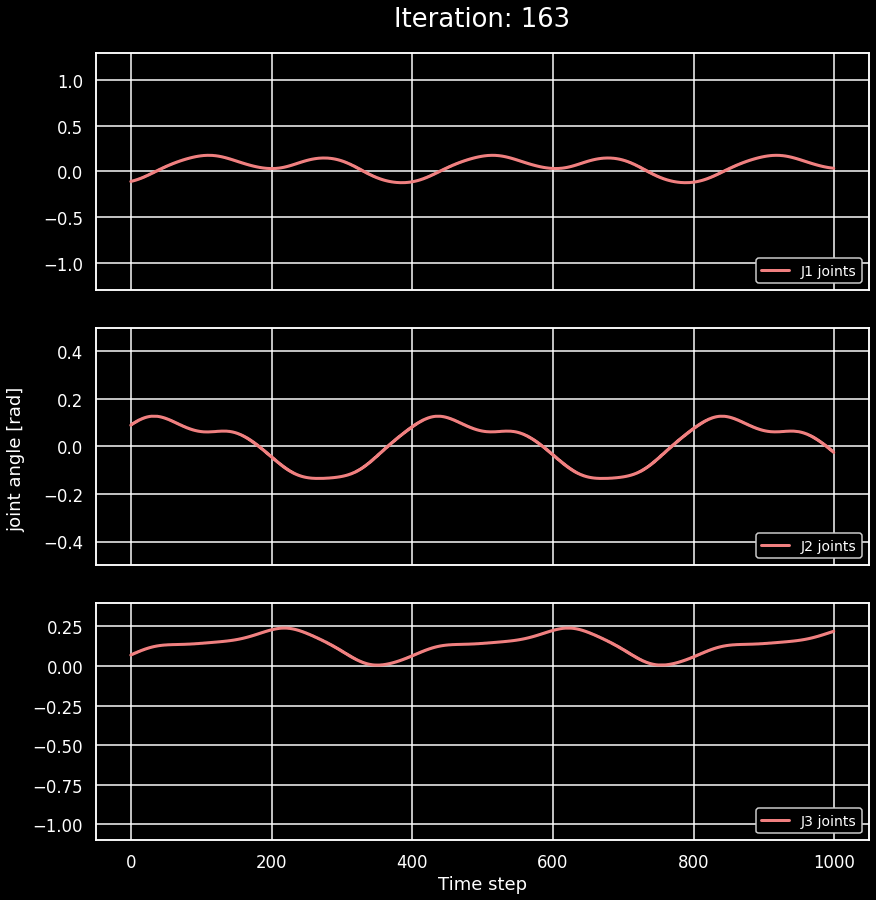

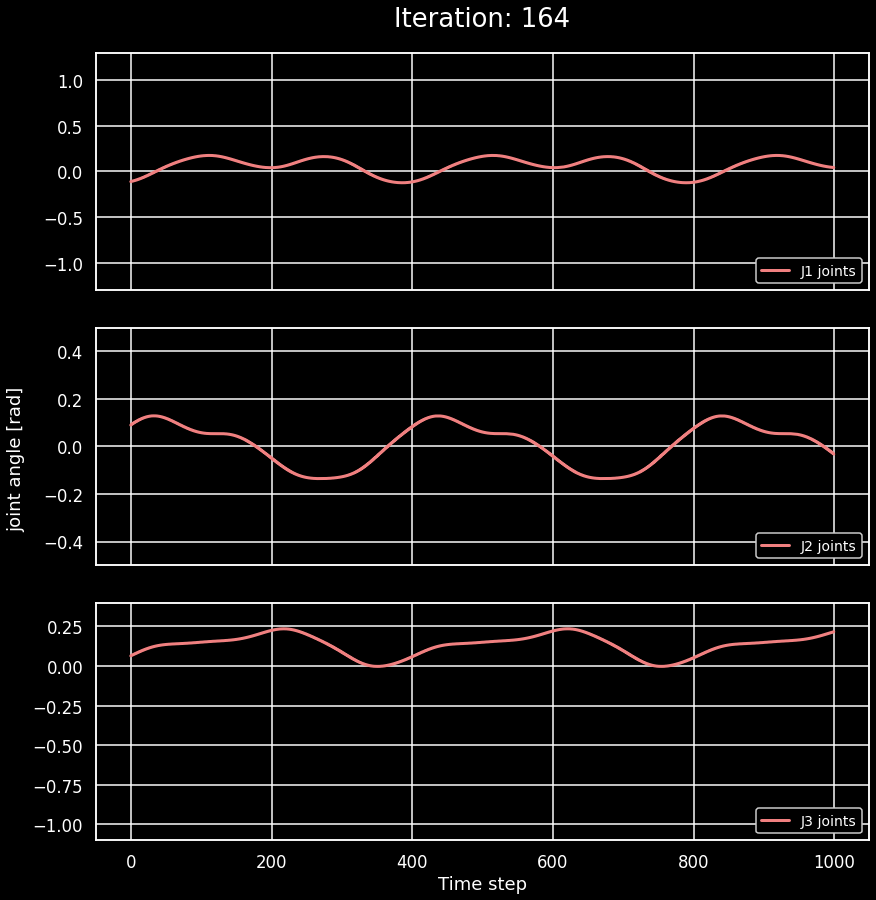

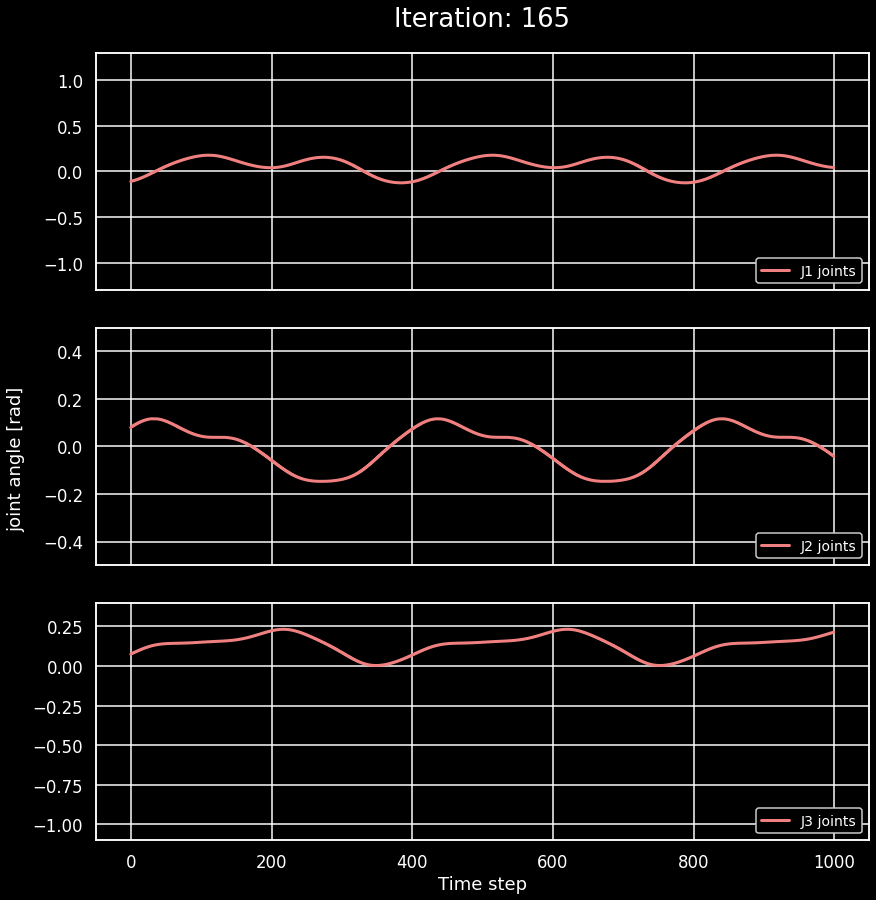

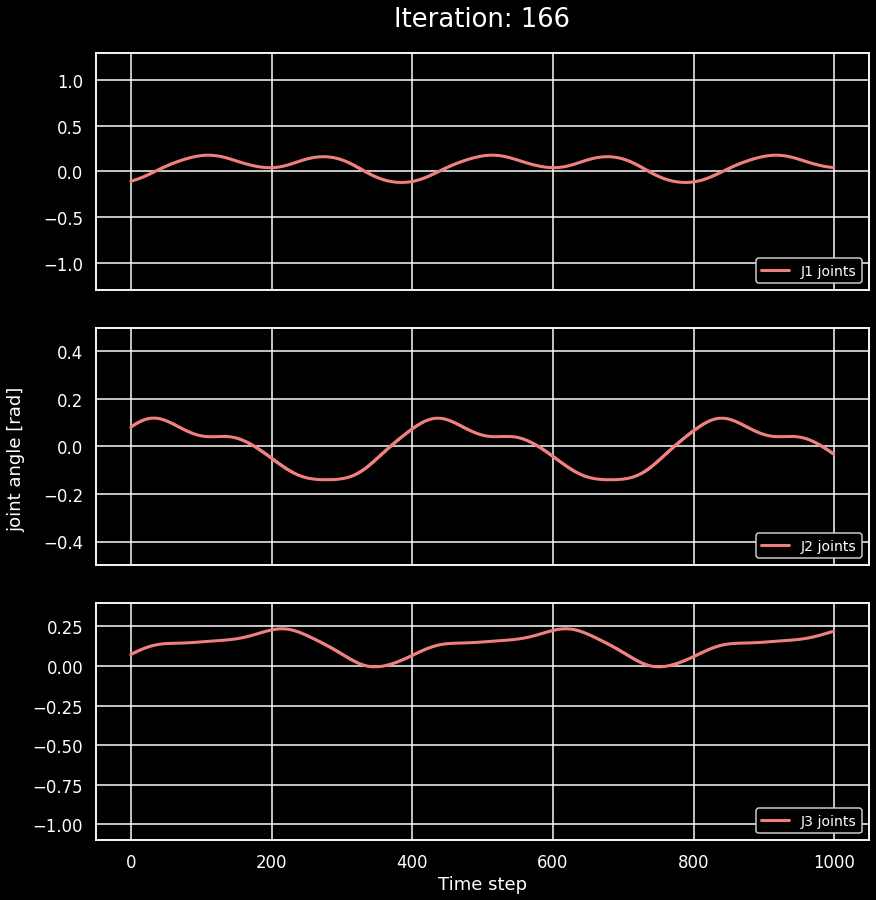

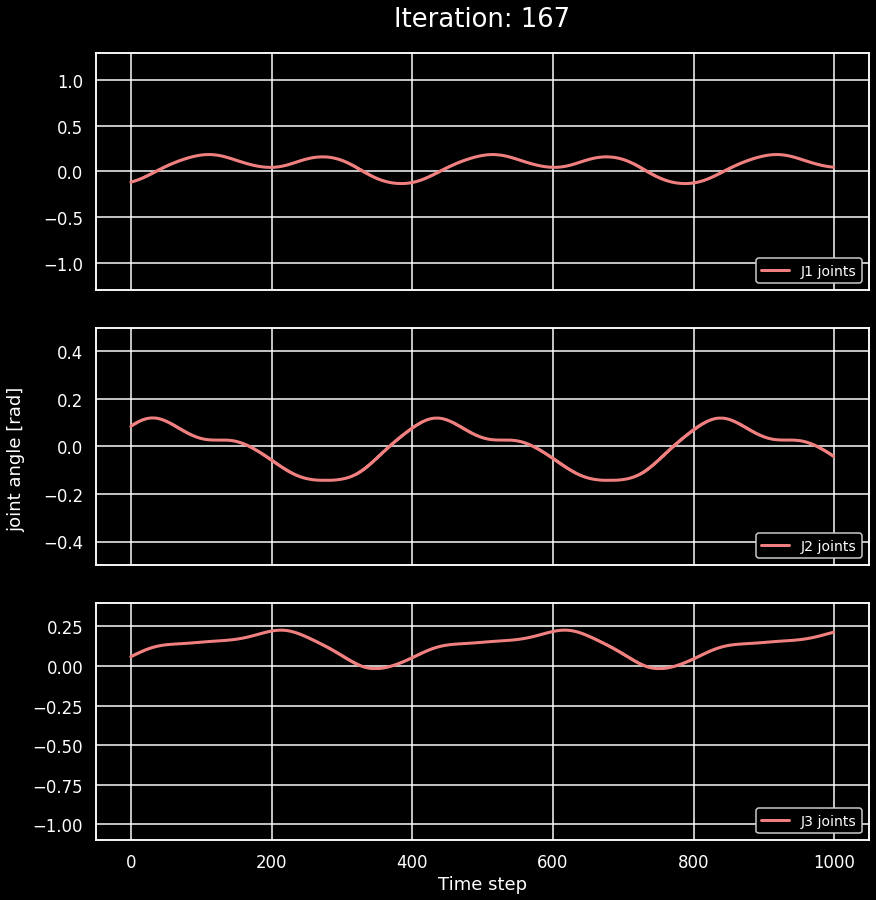

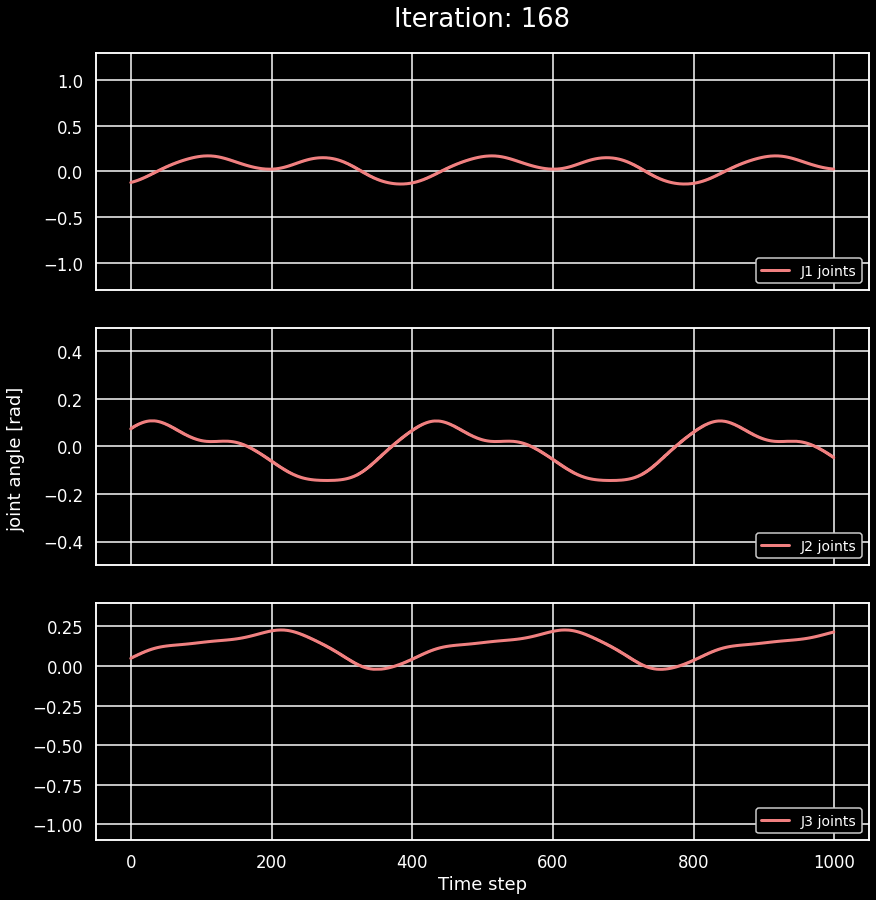

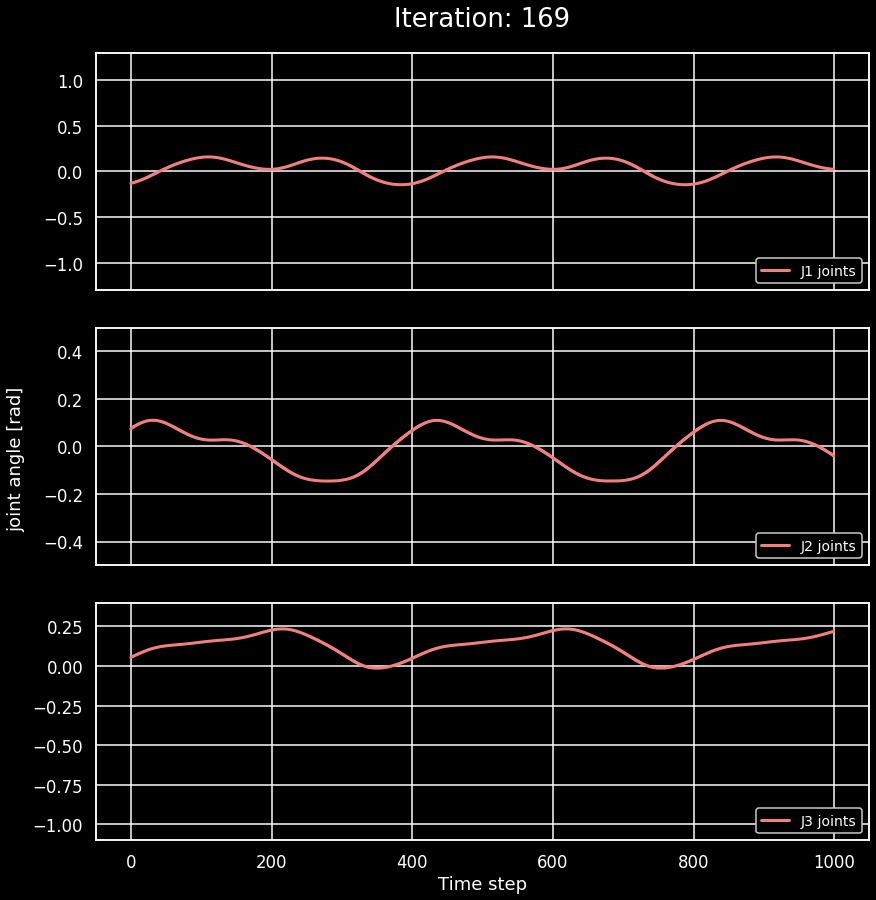

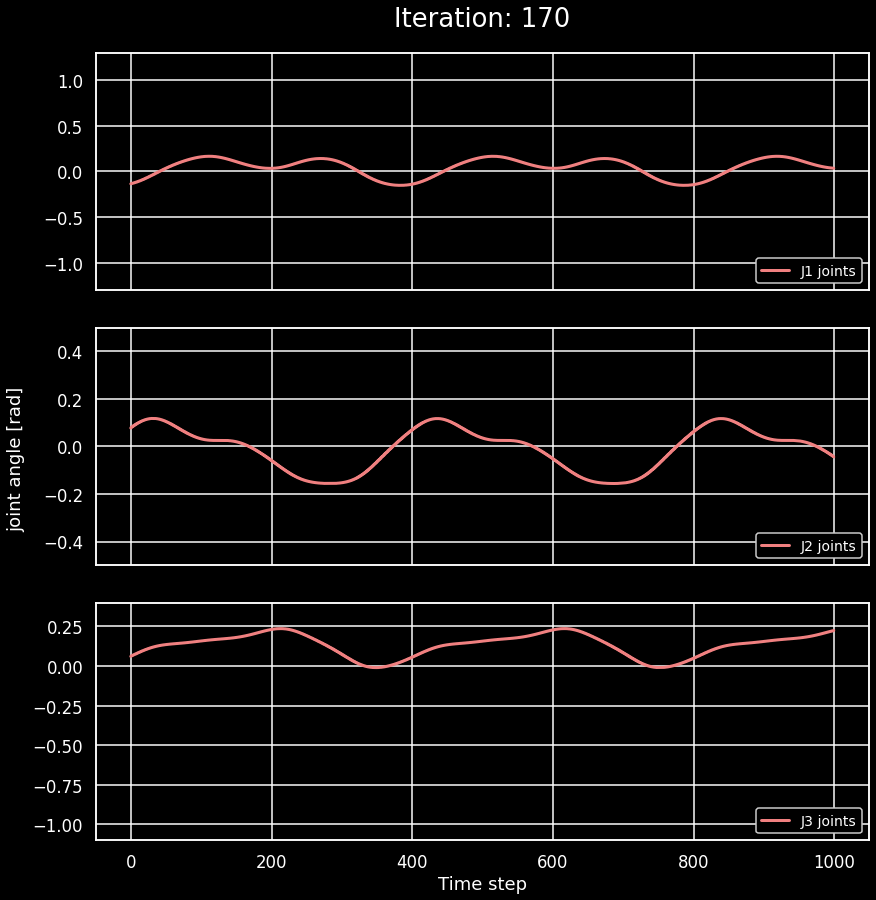

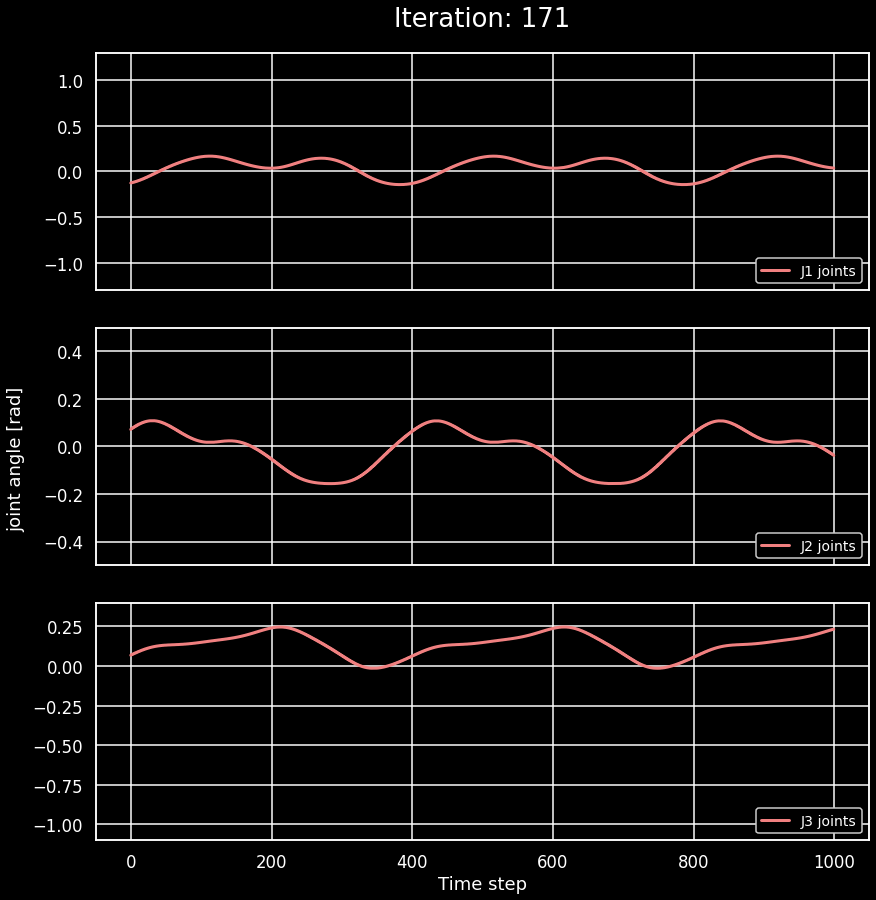

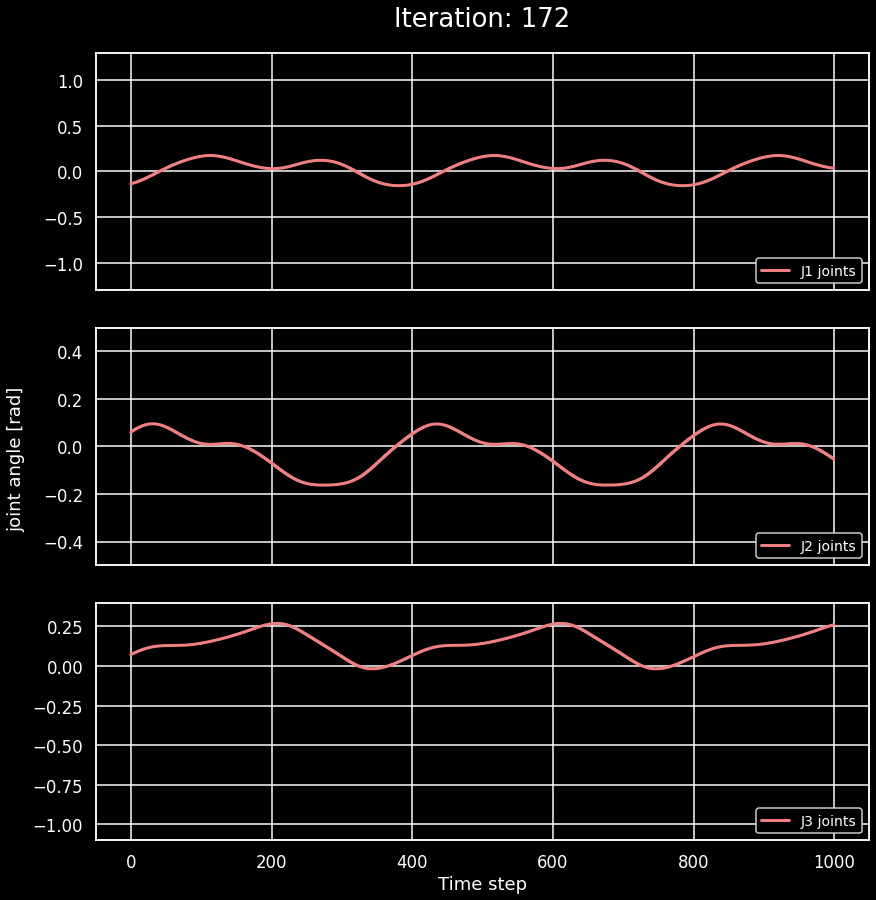

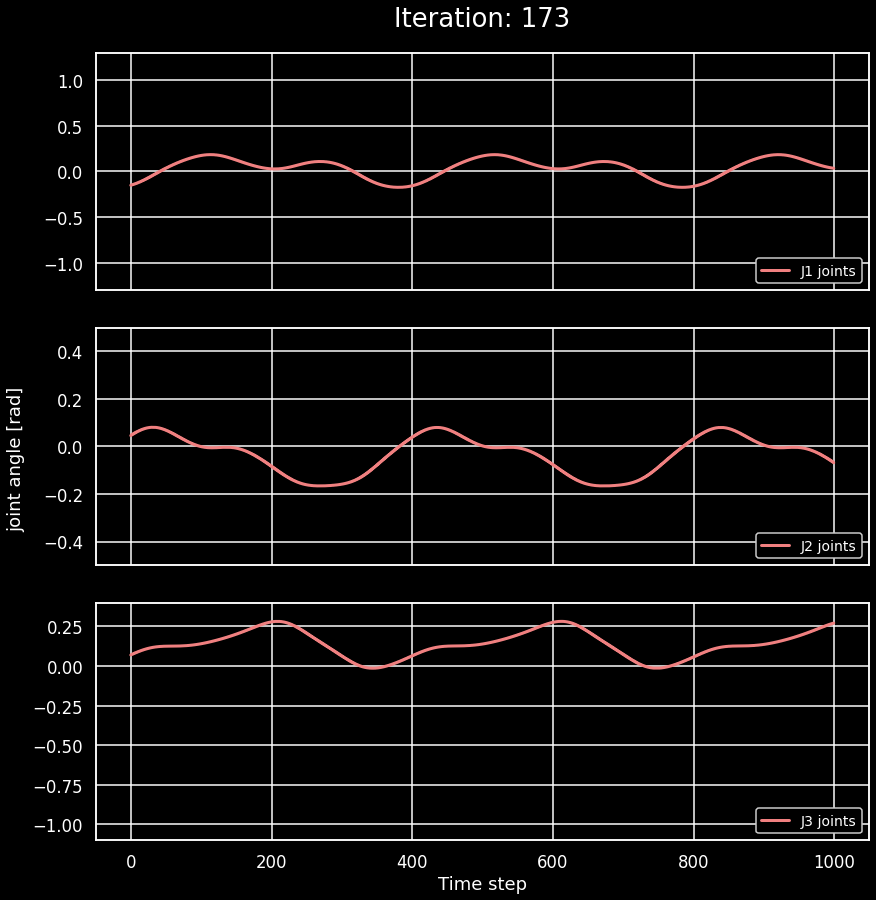

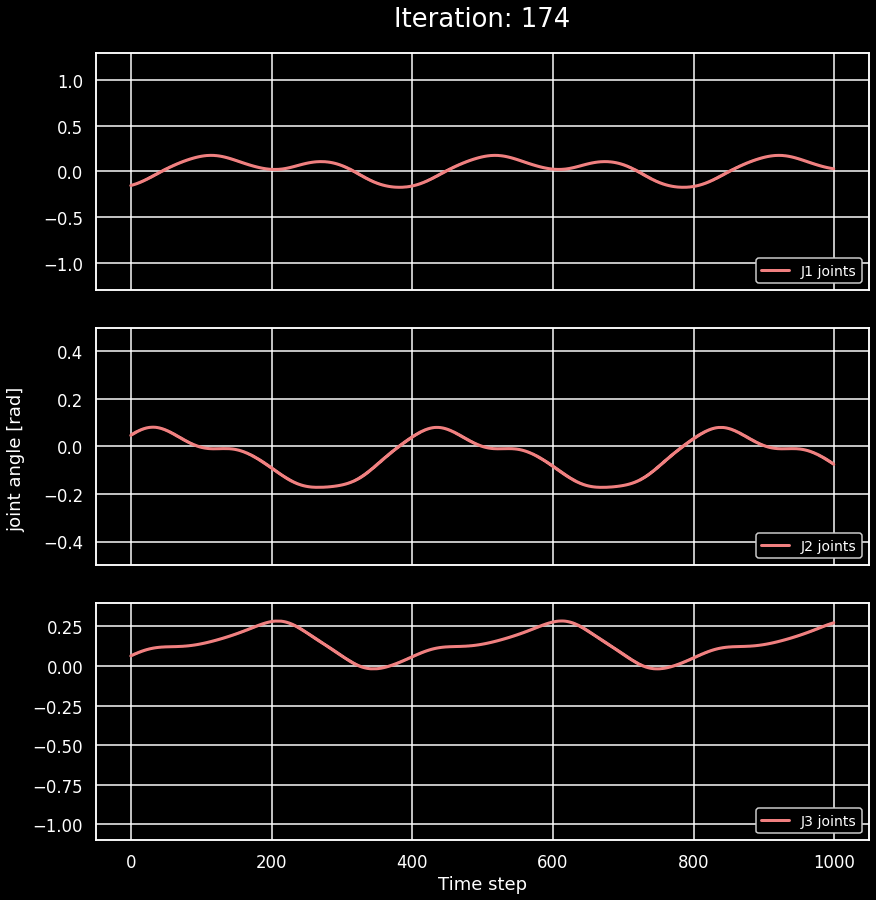

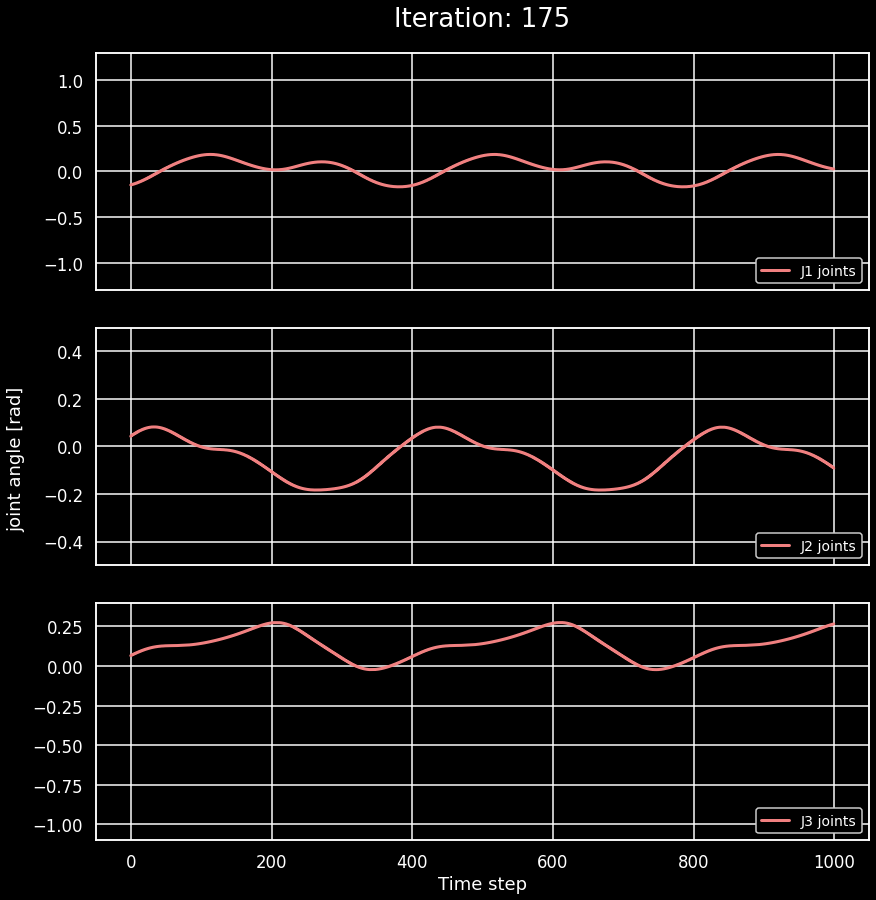

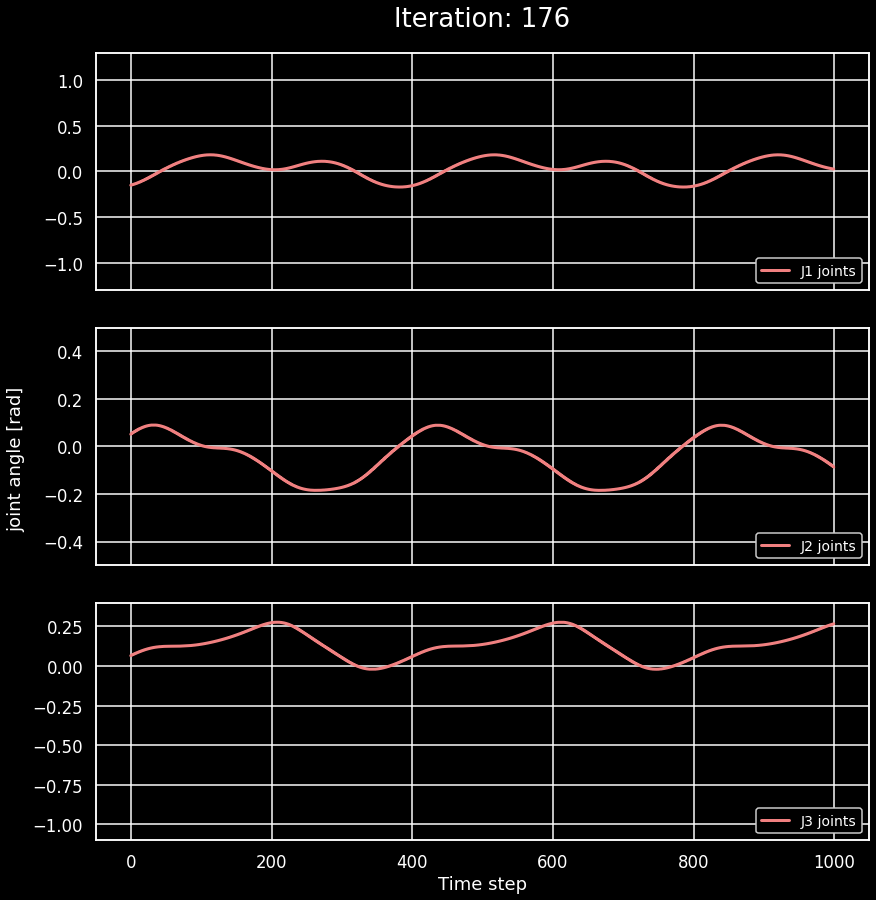

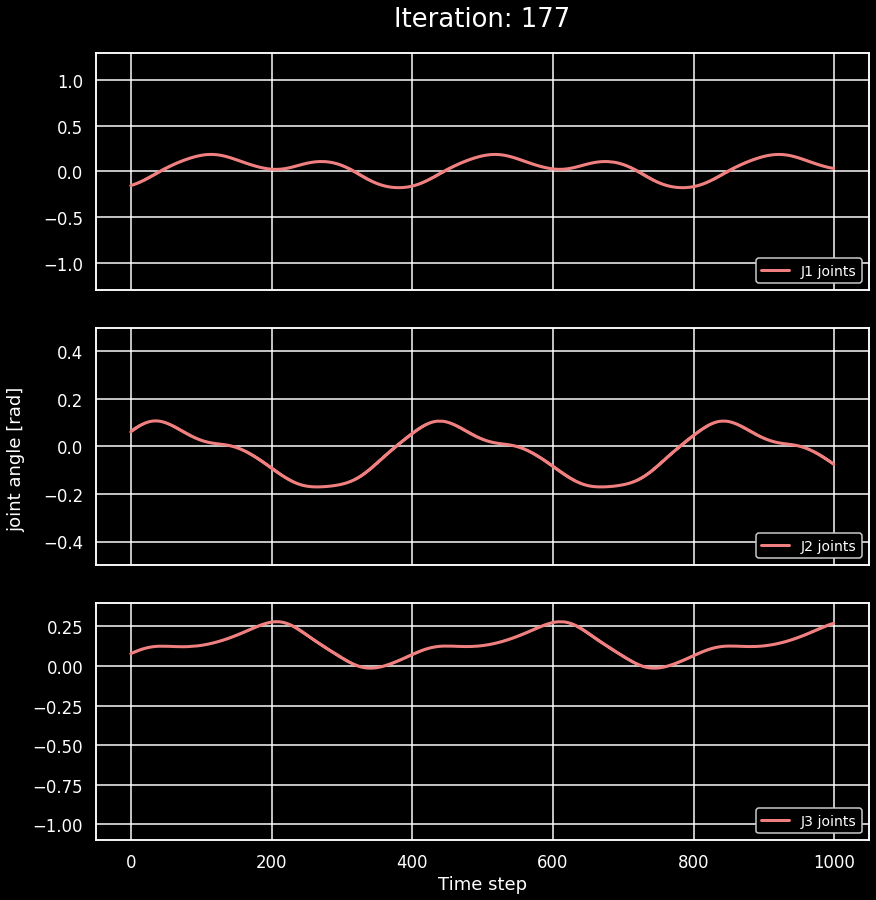

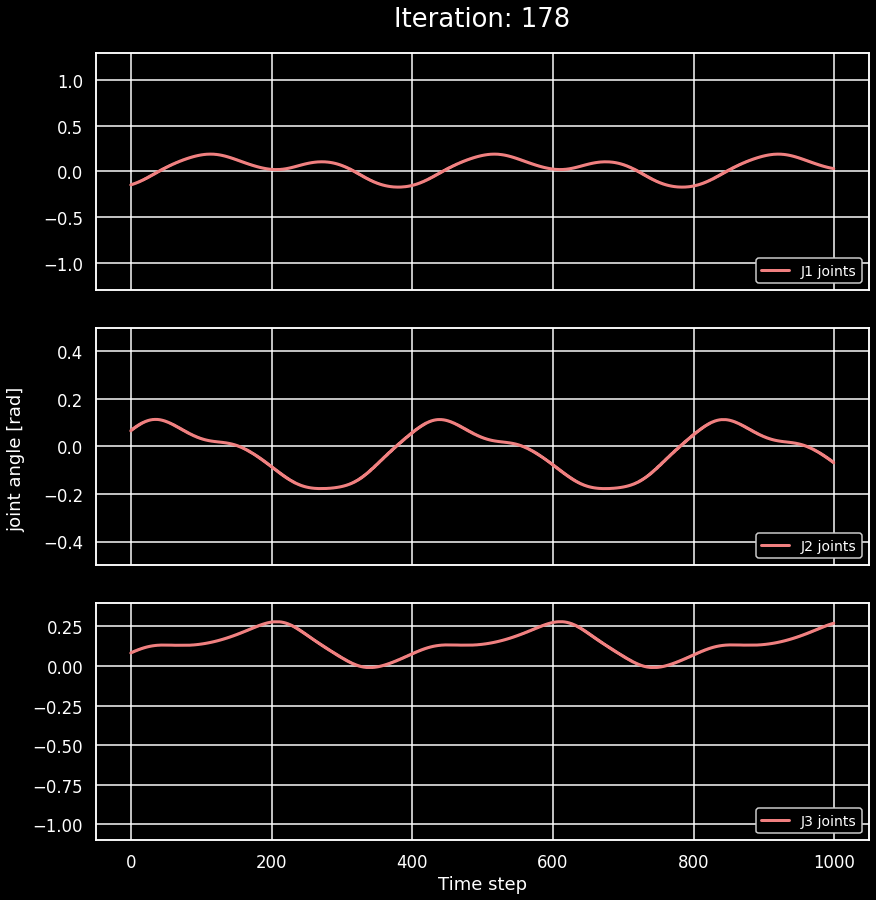

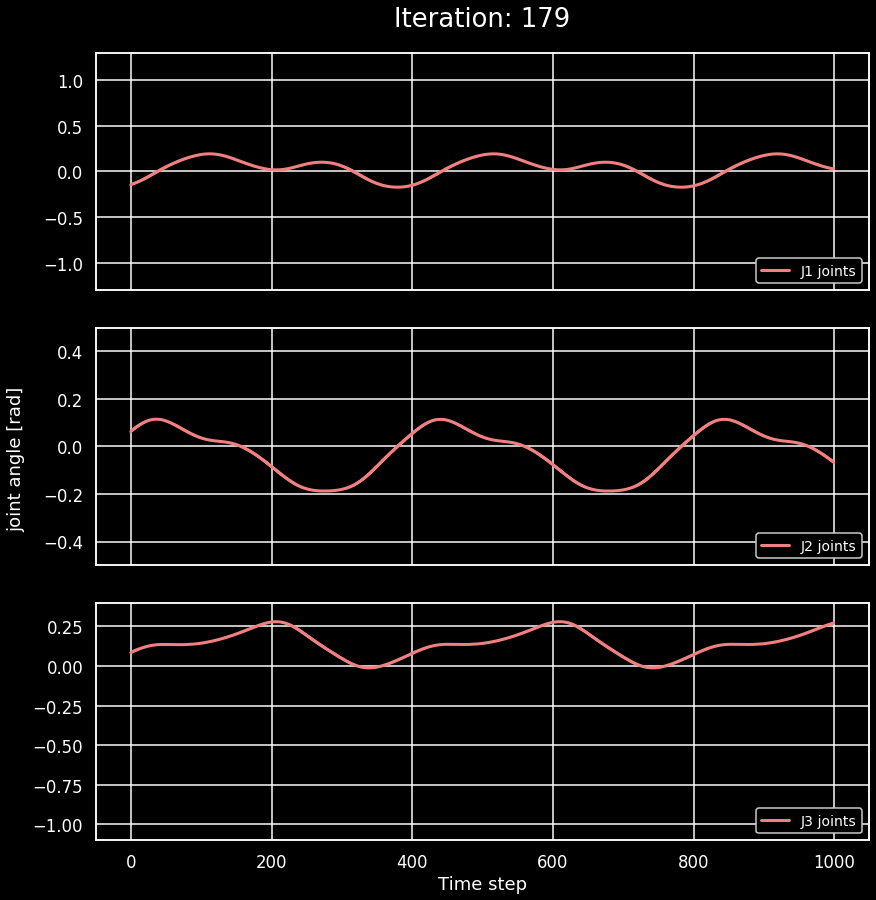

In [8]:
# LOAD .JSON

nc = 20;     # Number of kernels
W  = [0]*nc; # Weights 

# SO(2) Parameters
phi   = 0.01*math.pi # SO(2) Frequency
alpha = 1.01         # SO(2) Alpha term
w11   = alpha*math.cos(phi)
w12   = alpha*math.sin(phi)
w21   =-w12
w22   = w11
x     = []
y     = []
xy     = []
t     = []
s  = 0.04;   # Kernel variance

t.append(0)
x.append(-0.197)
y.append(0.0)
xy.append(x+y)

# Run for one period
period = 0
while x[period] >= x[0]:
    period = period+1
    t.append(period*0.0167)
    x.append(np.tanh(w11*x[period-1]+w12*y[period-1]));
    y.append(np.tanh(w22*y[period-1]+w21*x[period-1]));
    xy.append(x+y)
    
# Calculate kernels
ci = np.asarray(np.around(np.linspace(1, period, nc)), dtype=int)
cx = [0] * (len(ci))
cy = [0] * (len(ci))
350
for k in range(len(ci)):
    cx[k] = x[ci[k]]
    cy[k] = y[ci[k]]
    
for rollout in range(30):
    rollout+=50
    my_path ="./../"
    file_name=my_path+'data/jobs/RL_job_'+str(rollout)+'.json'

    with open(file_name) as json_file:
        data = json.load(json_file)
        parameter_arr    = data['ParameterSet']
        encoding         = data['checked']

    # PLOT IT
    W = parameter_arr
    modi_kernel_output = []
    legs = 4
    joints = int(len(W)/nc)
    network_output = [0] * joints
    network_output_collector = [[] for i in range(joints)]

    simtime=1000

    outH1=[]
    outH2=[]
    outH1.append(-0.2012)
    outH2.append(0.0)

    for t in range(simtime-1):
        outH1.append(np.tanh(w11*outH1[t-1]+w12*outH2[t-1]))
        outH2.append(np.tanh(w22*outH2[t-1]+w21*outH1[t-1]))

    K =np.zeros((nc,simtime))
    for j in range(nc):
        K[j]=np.exp(-(np.power((outH1-cx[j]),2)+np.power((outH2-cy[j]),2))/s)

    joint_W =np.zeros((joints,nc))
    for j in range(joints):
        for i in range(nc):
            joint_W[j][i] = (W[(j*nc)+i])

    M = np.dot(joint_W, K)

    fsize = 18
    lsize = 3
    lalph = 0.6
    pdpi  = 60 
    
    sns.set("talk", font_scale=1, rc={"lines.linewidth": 3, 'figure.figsize':(12, 12)})#, 'figure.dpi':200})   
    sns.set_palette("pastel")
    plt.style.use("dark_background")

    
    fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True)
    fig.tight_layout()
    fig.text(-0.035, 0.5, 'joint angle [rad]', va='center', rotation='vertical', fontsize="medium")
    fig.text(0.515, 1.0, "Iteration: "+str(format(rollout, '03d')), horizontalalignment='center', rotation='horizontal', fontsize="x-large")

#     fig.suptitle("Roll-out: "+str(format(rollout, '03d')), fontsize="x-large")

    axes = axes.flatten()

    if encoding=='sindirect' and legs==6:
        ax=sns.lineplot(range(simtime), M[0], ax=axes[0], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[1], ax=axes[0], color="seagreen")
        ax=sns.lineplot(range(simtime), M[2], ax=axes[0], color="skyblue")
        ax.legend(['J1 front legs', 'J1 middle legs', 'J1 hind legs'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    if encoding=='sindirect' and legs==4:
        ax=sns.lineplot(range(simtime), M[0], ax=axes[0], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[1], ax=axes[0], color="seagreen")
        ax.legend(['J1 front legs', 'J1 hind legs'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='direct' and legs==6:
        ax=sns.lineplot(range(simtime), M[0], ax=axes[0], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[1], ax=axes[0], color="seagreen")
        ax=sns.lineplot(range(simtime), M[2], ax=axes[0], color="skyblue")
        ax=sns.lineplot(range(simtime), M[3], ax=axes[0], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[4], ax=axes[0], color="seagreen")
        ax=sns.lineplot(range(simtime), M[5], ax=axes[0], color="skyblue")
        ax.lines[3].set_linestyle("--")
        ax.lines[4].set_linestyle("--")
        ax.lines[5].set_linestyle("--")
        ax.legend(['Left J1 front leg', 'Left J1 middle leg', 'Left J1 hind leg', 'Right J1 front leg', 'Right J1 middle leg', 'Right J1 hind leg'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='direct' and legs==4:
        ax=sns.lineplot(range(simtime), M[0], ax=axes[0], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[1], ax=axes[0], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[2], ax=axes[0], color="seagreen")
        ax=sns.lineplot(range(simtime), M[3], ax=axes[0], color="seagreen")
        ax.lines[1].set_linestyle("--")
        ax.lines[3].set_linestyle("--")
        ax.legend(['Left J1 front leg','Left J1 hind leg', 'Right J1 front leg', 'Right J1 hind leg'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='indirect':
        ax=sns.lineplot(range(simtime), M[0], ax=axes[0], color="lightcoral")
        ax.legend(['J1 joints'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    
    ax.set_ylim(-1.3, 1.3)

    if encoding=='sindirect' and legs==6:
        ax=sns.lineplot(range(simtime), M[3], ax=axes[1], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[4], ax=axes[1], color="seagreen")
        ax=sns.lineplot(range(simtime), M[5], ax=axes[1], color="skyblue")
        ax.legend(['J2 front legs', 'J2 middle legs', 'J2 hind legs'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    if encoding=='sindirect' and legs==4:
        ax=sns.lineplot(range(simtime), M[2], ax=axes[1], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[3], ax=axes[1], color="seagreen")
        ax.legend(['J2 front legs', 'J2 hind legs'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='direct' and legs==6:
        ax=sns.lineplot(range(simtime), M[6], ax=axes[1], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[7], ax=axes[1], color="seagreen")
        ax=sns.lineplot(range(simtime), M[8], ax=axes[1], color="skyblue")
        ax=sns.lineplot(range(simtime), M[9], ax=axes[1], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[10], ax=axes[1], color="seagreen")
        ax=sns.lineplot(range(simtime), M[11], ax=axes[1], color="skyblue")
        ax.lines[3].set_linestyle("--")
        ax.lines[4].set_linestyle("--")
        ax.lines[5].set_linestyle("--")
        ax.legend(['Left J2 front leg', 'Left J2 middle leg', 'Left J2 hind leg', 'Right J2 front leg', 'Right J2 middle leg', 'Right J2 hind leg'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='direct' and legs==4:
        ax=sns.lineplot(range(simtime), M[4], ax=axes[1], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[5], ax=axes[1], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[6], ax=axes[1], color="seagreen")
        ax=sns.lineplot(range(simtime), M[7], ax=axes[1], color="seagreen")
        ax.lines[1].set_linestyle("--")
        ax.lines[3].set_linestyle("--")
        ax.legend(['Left J2 front leg','Left J2 hind leg', 'Right J2 front leg', 'Right J2 hind leg'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='indirect':
        ax=sns.lineplot(range(simtime), M[1], ax=axes[1], color="lightcoral")
        ax.legend(['J2 joints'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)

    ax.set_ylim(-0.5, 0.5)

    if encoding=='sindirect' and legs==6:
        ax=sns.lineplot(range(simtime), M[6], ax=axes[2], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[7], ax=axes[2], color="seagreen")
        ax=sns.lineplot(range(simtime), M[8], ax=axes[2], color="skyblue")
        ax.legend(['J3 front legs', 'J3 middle legs', 'J3 hind legs'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    if encoding=='sindirect' and legs==4:
        ax=sns.lineplot(range(simtime), M[4], ax=axes[2], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[5], ax=axes[2], color="seagreen")
        ax.legend(['J3 front legs', 'J3 hind legs'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='direct' and legs==6:
        ax=sns.lineplot(range(simtime), M[12], ax=axes[2], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[13], ax=axes[2], color="seagreen")
        ax=sns.lineplot(range(simtime), M[14], ax=axes[2], color="skyblue")
        ax=sns.lineplot(range(simtime), M[15], ax=axes[2], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[16], ax=axes[2], color="seagreen")
        ax=sns.lineplot(range(simtime), M[17], ax=axes[2], color="skyblue")
        ax.lines[3].set_linestyle("--")
        ax.lines[4].set_linestyle("--")
        ax.lines[5].set_linestyle("--")
        ax.legend(['Left J3 front leg', 'Left J3 middle leg', 'Left J3 hind leg', 'Right J3 front leg', 'Right J3 middle leg', 'Right J3 hind leg'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='direct' and legs==4:
        ax=sns.lineplot(range(simtime), M[8], ax=axes[2], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[9], ax=axes[2], color="lightcoral")
        ax=sns.lineplot(range(simtime), M[10], ax=axes[2], color="seagreen")
        ax=sns.lineplot(range(simtime), M[11], ax=axes[2], color="seagreen")
        ax.lines[1].set_linestyle("--")
        ax.lines[3].set_linestyle("--")
        ax.legend(['Left J3 front leg','Left J3 hind leg', 'Right J3 front leg', 'Right J3 hind leg'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)
    elif encoding=='indirect':
        ax=sns.lineplot(range(simtime), M[2], ax=axes[2], color="lightcoral")
        ax.legend(['J3 joints'], loc='lower right', framealpha=1, prop={'size': 14}, ncol=2)

    ax.set_ylim(-1.1, 0.4)
    ax.set(xlabel='Time step')
    
    #fig.savefig("./gif_j1/"+str(format(rollout, '03d'))+".png", bbox_inches="tight")
    #plt.close()

    # ffmpeg -framerate 24 -i %03d.png Project.mp4
    # ffmpeg -framerate 24 -i %03d.png -c:v libx264 -pix_fmt yuv420p Project.mp4
    
    for ax in axes:
        ax.label_outer()
